In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [53]:
NUM_TRIALS = 10000
EPS = 0.1     #e is use for selection of random bandit to make our model more precise
BANDIT_PROB = [0.2,0.5,0.9] #win rate of 3 bandit of casino

In [35]:
np.random.random()
np.arange(NUM_TRIALS)+1

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [36]:
class Bandit:
    def __init__(self,p):
        self.p = p
        self.p_estimate = 0 #win rate after every trial
        self.N = 0 #no of same collected so far
        
    def pull(self): #draw 1 with probability p
        return np.random.random() < self.p
    
    def update(self,x):
        self.N += 1
        self.p_estimate = self.p_estimate+(x-self.p_estimate)/self.N

## Epsilon Greedy Algorithm

In [37]:
def experiment():
    bandit = [Bandit(p) for p in BANDIT_PROB]
    reward = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandit])
    print("optimal j::",optimal_j)
    
    for  i in range(NUM_TRIALS):
        #use epsilon to select next bandit
        if np.random.random() < EPS:
            num_times_explored+=1
            j = np.random.randint(len(bandit))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandit])
        if j == optimal_j:
            num_optimal+=1
        
        x = bandit[j].pull() #pull arm to know he win or not
        
        reward[i] = x    #collect reward
        
        bandit[j].update(x)   #update the distribution whose arm just pulled
        
    for b in bandit:
        print('mean_estimate:: ',b.p_estimate)
    #print reward
    print('total reward earned: ',reward.sum())
    print('win rate: ',reward.sum()/NUM_TRIALS)
    print('exploited: ',num_times_exploited)
    print('explored: ',num_times_explored)
    print('num_times_selected OptimalBandit: ',num_optimal)
    
    #plot the result
    cum_reward = np.cumsum(reward)
    win_rate = cum_reward/(np.arange(NUM_TRIALS)+1)
    plt.plot(win_rate)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROB))
    plt.show()

optimal j:: 2
mean_estimate::  0.19602272727272715
mean_estimate::  0.4735294117647057
mean_estimate::  0.8990116029222173
total reward earned:  8598.0
win rate:  0.8598
exploited:  8955
explored:  1045
num_times_selected OptimalBandit:  9308


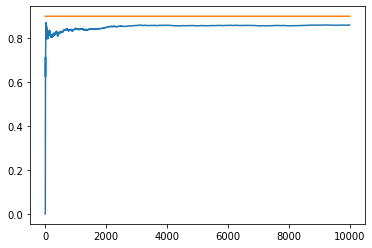

In [38]:
experiment()

## EGA Epsilon Decay

<ol><li>e(t) = k/t</li>
<li>e(t) = e0*a^t</li>
<li>e(t) = a/log(b*t+c)</li>
<li>e(t) = max(e0-k*t,emin)</li>
   </ol>
   
<p>Here we need decay bcz in starting we need to explore and after sometime we need more </p>

In [59]:
def experimentdecay():
    bandit = [Bandit(p) for p in BANDIT_PROB]
    reward = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandit])
    print("optimal j::",optimal_j)
    
    for  i in range(NUM_TRIALS):
        global EPS
        #use epsilon to select next bandit
        if np.random.random() < EPS:
            num_times_explored+=1
            j = np.random.randint(len(bandit))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandit])
        if j == optimal_j:
            num_optimal+=1
        
        x = bandit[j].pull() #pull arm to know he win or not
        
        reward[i] = x    #collect reward
        
        bandit[j].update(x)   #update the distribution whose arm just pulled
        EPS = EPS/float(i)
        
    for b in bandit:
        print('mean_estimate:: ',b.p_estimate)
    #print reward
    print('total reward earned: ',reward.sum())
    print('win rate: ',reward.sum()/NUM_TRIALS)
    print('exploited: ',num_times_exploited)
    print('explored: ',num_times_explored)
    print('num_times_selected OptimalBandit: ',num_optimal)
    
    #plot the result
    cum_reward = np.cumsum(reward)
    win_rate = cum_reward/(np.arange(NUM_TRIALS)+1)
    plt.plot(win_rate)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROB))
    plt.show()

In [60]:
experimentdecay()

optimal j:: 2


ZeroDivisionError: float division by zero

In [56]:
EPS

0.1